In [35]:
import pandas as pd
import numpy as np
df = pandas.read_csv("/content/netflix_data.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [37]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [43]:
from datetime import date
# Handling null values
df.isnull().sum()

cleandf = df.assign(
    rating=df["rating"].fillna("Unknown"),
    country=df["country"].fillna("Unknown"),
    cast=df["cast"].fillna("N/A"),
    director=df["director"].fillna("N/A"),
    duration=df["duration"].fillna("N/A"),
    date_added=df["date_added"].fillna("N/A")
)

In [44]:
type_by_country = cleandf.groupby(["country", "type"]).size().unstack().fillna(0)
type_by_country
type_by_country.sort_values(by="Movie", ascending=False, inplace=True)
type_by_country

type,Movie,TV Show
country,,
United States,2058.0,760.0
India,893.0,79.0
Unknown,440.0,391.0
United Kingdom,206.0,213.0
Canada,122.0,59.0
...,...,...
"Brazil, United Kingdom",0.0,1.0
"Canada, Australia",0.0,2.0
"Austria, Germany",0.0,1.0


<Figure size 1200x600 with 0 Axes>

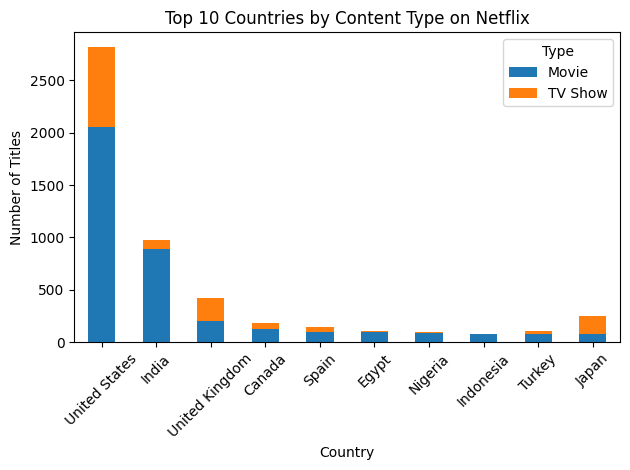

In [40]:

# Filter out the 'Unknown' country
type_by_country_filtered = type_by_country[type_by_country.index != 'Unknown']

# graph
plt.figure(figsize=(12, 6))
type_by_country_filtered.head(10).plot(kind="bar", stacked=True)
plt.title("Top 10 Countries by Content Type on Netflix")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.legend(title="Type")
plt.xticks(rotation=45)
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()


In [47]:
# movies per year (over the last 30 years)
cleandf["release_year"] = pd.to_numeric(cleandf["release_year"]) # covert str to int
df_last_30years = cleandf[cleandf["release_year"] >= 1991]
df_last_30years.sort_values(by="release_year", inplace=True)
df_last_30years

/tmp/ipython-input-47-2335729073.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_30years.sort_values(by="release_year", inplace=True)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4229,s4230,Movie,Bill Hicks: One Night Stand,John Fortenberry,Bill Hicks,United Kingdom,"December 31, 2018",1991,TV-MA,28 min,Stand-Up Comedy,Bill Hicks remembers a wild night in 1989 and ...
8050,s8051,Movie,Solo Con Tu Pareja,Alfonso Cuarón,"Luis de Icaza, Dobrina Liubomirova, Isabel Ben...",Mexico,"September 1, 2018",1991,NR,94 min,"Comedies, Independent Movies, International Mo...",A yuppie playboy looks for a quick death after...
8159,s8160,Movie,Teenage Mutant Ninja Turtles II: The Secret of...,Michael Pressman,"Paige Turco, David Warner, Mark Caso, Michelan...","United States, Hong Kong","January 1, 2020",1991,PG,88 min,"Children & Family Movies, Comedies",The evil Shredder decides that ooze is what gi...
6347,s6348,TV Show,Bob Ross: Beauty Is Everywhere,N/A,Bob Ross,Unknown,"June 1, 2016",1991,TV-G,1 Season,TV Shows,"""The Joy of Painting"" host Bob Ross brings his..."
4239,s4240,Movie,Sam Kinison: Live in Vegas,Walter C. Miller,Sam Kinison,United States,"December 31, 2018",1991,TV-MA,71 min,Stand-Up Comedy,Standup legend Sam Kinison is at his screaming...
...,...,...,...,...,...,...,...,...,...,...,...,...
19,s20,TV Show,Jaguar,N/A,"Blanca Suárez, Iván Marcos, Óscar Casas, Adriá...",Unknown,"September 22, 2021",2021,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...","In the 1960s, a Holocaust survivor joins a gro..."
18,s19,Movie,Intrusion,Adam Salky,"Freida Pinto, Logan Marshall-Green, Robert Joh...",Unknown,"September 22, 2021",2021,TV-14,94 min,Thrillers,After a deadly home invasion at a couple’s new...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


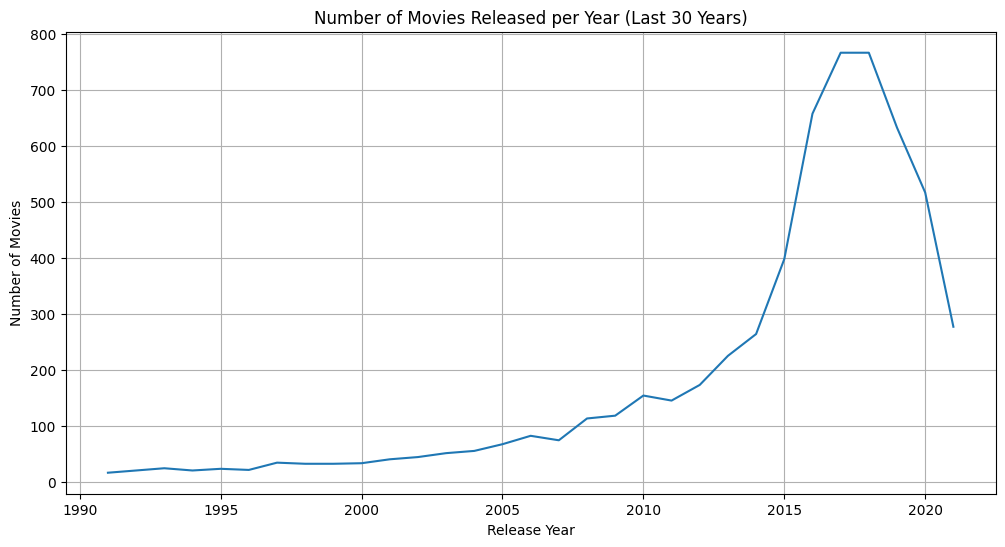

In [50]:
import matplotlib.pyplot as plt

# finding count of movie during the last 30 years
movies_per_year = df_last_30years[df_last_30years['type'] == 'Movie'].groupby('release_year').size()
plt.figure(figsize=(12, 6))
movies_per_year.plot(kind='line')
plt.title('Number of Movies Released per Year (Last 30 Years)')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()


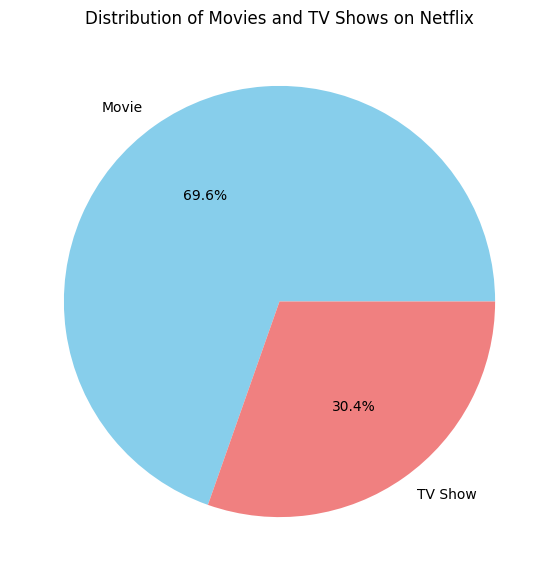

In [53]:
### Comparison Between TV Shows and Movies
type_counts = df["type"].value_counts()

plt.figure(figsize=(7, 7))
type_counts.plot(kind="pie", autopct="%1.1f%%", colors=["skyblue", "lightcoral"])
plt.title("Distribution of Movies and TV Shows on Netflix")
plt.ylabel("")
plt.show()

,count
month_added,
January,181
February,175
March,205
April,209
May,187
June,232
July,254
August,230
September,246


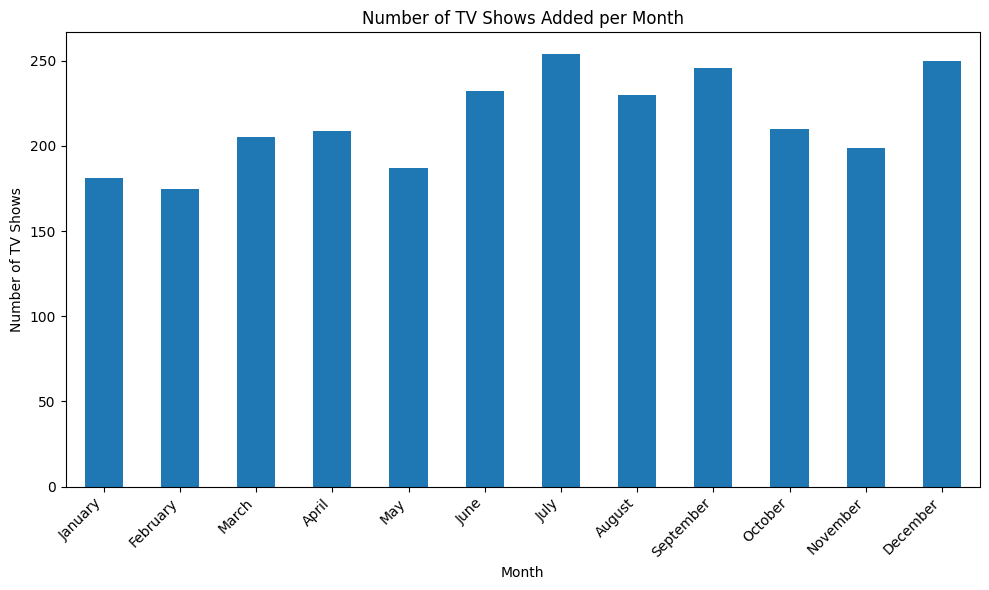

In [56]:
# Convert 'date_added' to datetime objects, coercing errors for invalid parsing
cleandf['date_added'] = pd.to_datetime(cleandf['date_added'], errors='coerce')

# Filter for TV Shows
tv_shows_df = cleandf[cleandf['type'] == 'TV Show'].copy()

# Extract the month
tv_shows_df['month_added'] = tv_shows_df['date_added'].dt.month

# Count TV shows per month, dropping NaT values
monthly_tv_shows = tv_shows_df['month_added'].value_counts().sort_index()

# Map month numbers to month names for better readability
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
monthly_tv_shows.index = monthly_tv_shows.index.map(month_names)

display(monthly_tv_shows)

# visualize the data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
monthly_tv_shows.plot(kind='bar')
plt.title('Number of TV Shows Added per Month')
plt.xlabel('Month')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

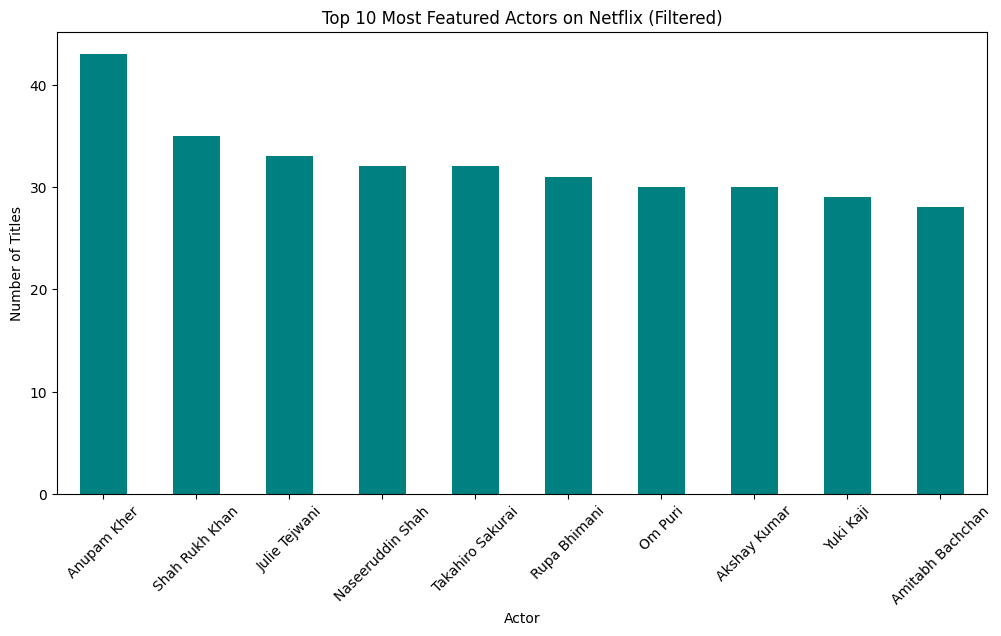

In [57]:
## Most Featured Actors (Filtered) ###
actor_counts = cleandf["cast"].str.split(", ").explode().value_counts()

# Remove extreme values (actors appearing in more than 100 titles)
actor_counts = actor_counts[actor_counts.between(1, 100)]

top_actors = actor_counts.head(10)

plt.figure(figsize=(12, 6))
top_actors.plot(kind="bar", color="teal")
plt.title("Top 10 Most Featured Actors on Netflix (Filtered)")
plt.xlabel("Actor")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

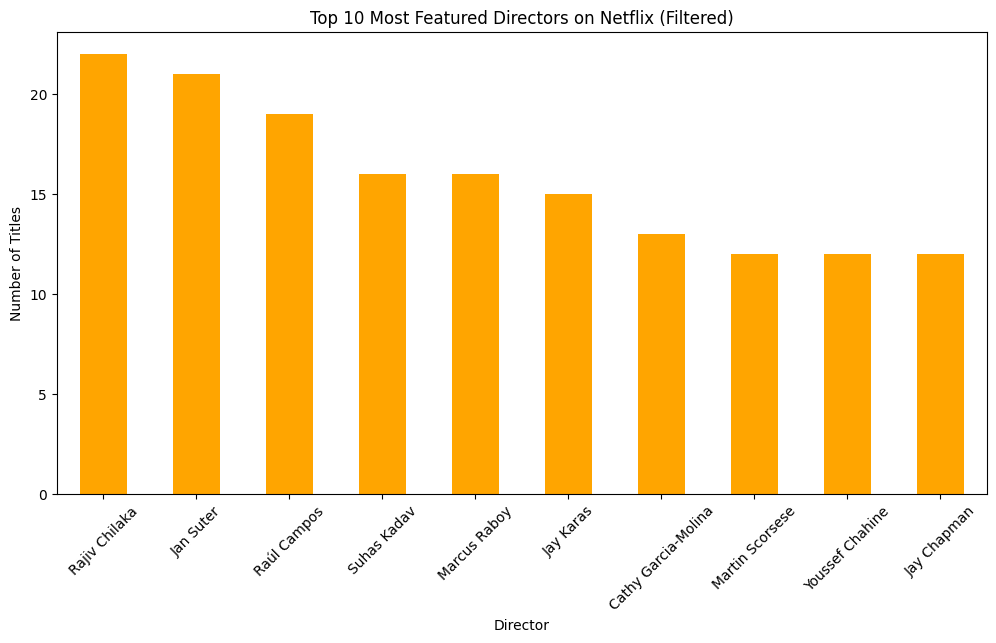

In [58]:
### Most Featured Directors (Filtered) ###
director_counts = cleandf["director"].str.split(", ").explode().value_counts()

# Remove extreme values (directors appearing in more than 100 titles)
director_counts = director_counts[director_counts.between(1, 100)]

top_directors = director_counts.head(10)

plt.figure(figsize=(12, 6))
top_directors.plot(kind="bar", color="orange")
plt.title("Top 10 Most Featured Directors on Netflix (Filtered)")
plt.xlabel("Director")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

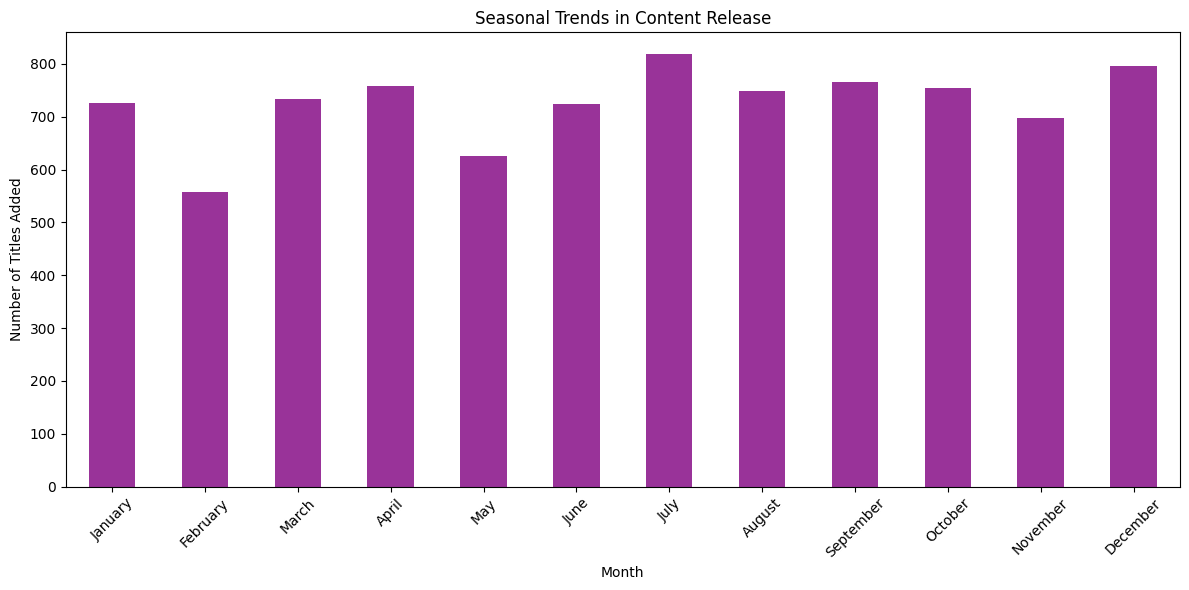

In [60]:
### Seasonal Trends in Content Release ###
# Ensure 'date_added' is in datetime format and extract month
cleandf['date_added'] = pd.to_datetime(cleandf['date_added'], errors='coerce')
cleandf['month_added'] = cleandf['date_added'].dt.month

# Group by month and count
seasonal_trends = cleandf.groupby('month_added').size()

# Map month numbers to month names for better readability
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
seasonal_trends.index = seasonal_trends.index.map(month_names)

plt.figure(figsize=(12, 6))
seasonal_trends.plot(kind="bar", color="purple", alpha=0.8)
plt.title("Seasonal Trends in Content Release")
plt.xlabel("Month")
plt.ylabel("Number of Titles Added")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-64-2860588152.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_by_country_filtered['Total Content'] = type_by_country_filtered['Movie'] + type_by_country_filtered['TV Show']


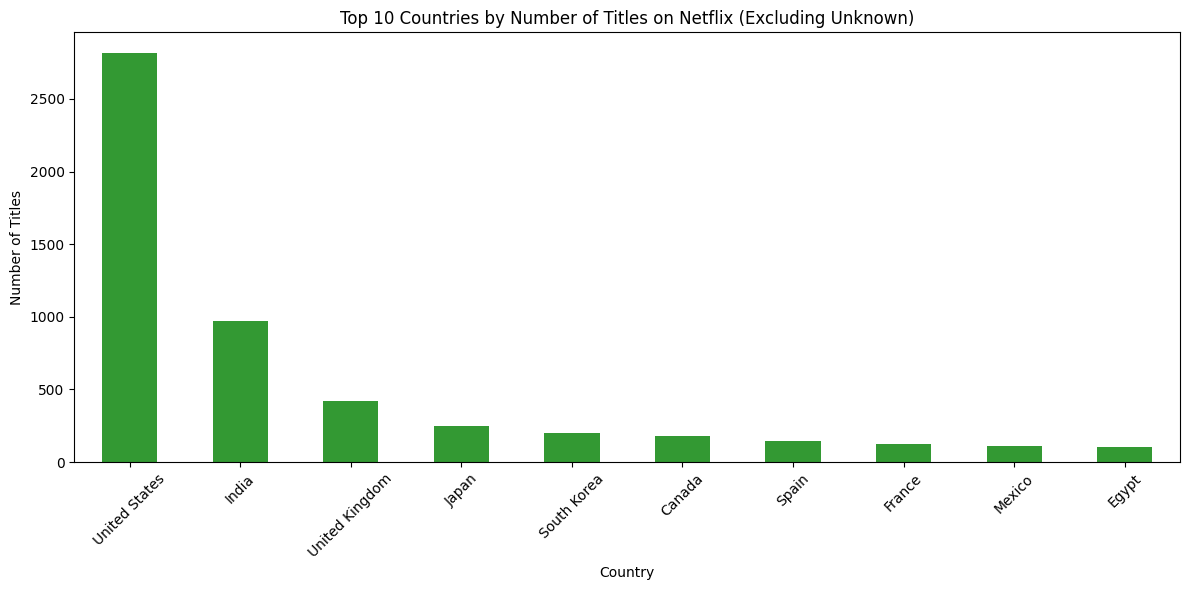

In [64]:
### Top 10 Countries by Total Netflix Content ###
# Calculate the total content per country by summing the 'Movie' and 'TV Show' columns
type_by_country_filtered['Total Content'] = type_by_country_filtered['Movie'] + type_by_country_filtered['TV Show']

# Sort by total content in descending order and get the top 10
top_countries = type_by_country_filtered.sort_values(by='Total Content', ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_countries['Total Content'].plot(kind="bar", color="green", alpha=0.8)
plt.title("Top 10 Countries by Number of Titles on Netflix (Excluding Unknown)")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()